## 2-8

In [2]:
import cv2
from PIL import Image
from IPython import display
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

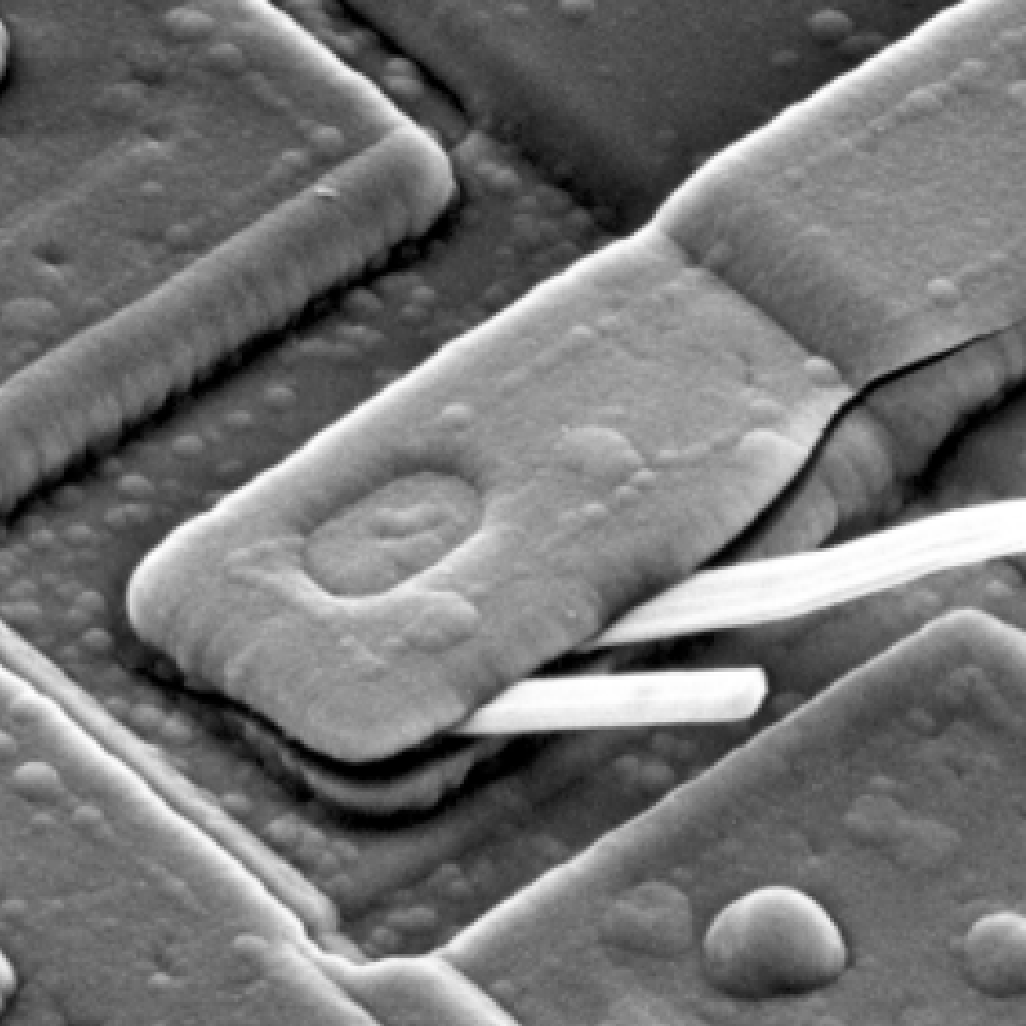

In [11]:
test4 = './实验二素材/test4.tif'

img = Image.open(test4)
img

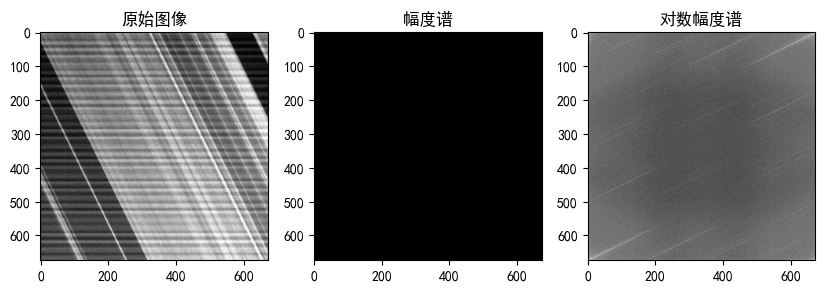

In [36]:
# 求取幅度谱, 用log函数调整动态范围，对比调整前后的结果
img_np = np.array(img)
img_np = np.fft.fft2(img_np)
# img_np = np.fft.fftshift(img_np)
img_np = np.abs(img_np)
img_np_log = np.log(img_np + 1)
img_np_log = (img_np_log / np.max(img_np_log) * 255).astype(np.uint8)
img_np = (img_np / np.max(img_np) * 255).astype(np.uint8)
img_np = Image.fromarray(img_np)
img_np_log = Image.fromarray(img_np_log)
plt.figure(figsize=(10, 10))
plt.subplot(131)

plt.title('原始图像')
plt.imshow(img, cmap='gray')
plt.subplot(132)

plt.title('幅度谱')
plt.imshow(img_np, cmap='gray')
plt.subplot(133)

plt.title('对数幅度谱')
plt.imshow(img_np_log, cmap='gray')
plt.show()

## 2-9

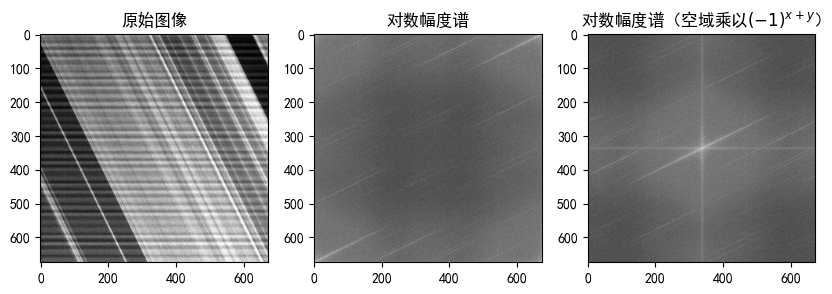

In [35]:
# 在离散傅里叶变换之前，先在图像空域乘以(-1)^(x+y)，再进行傅里叶变换，对比幅度谱
img_np_2 = np.array(img)
x, y = np.indices(img_np_2.shape)
img_np_2 = img_np_2 * (-1) ** (x + y)
img_np_2 = np.fft.fft2(img_np_2)
img_np_2 = np.abs(img_np_2)
img_np_log_2 = np.log(img_np_2 + 1)
img_np_log_2 = (img_np_log_2 / np.max(img_np_log_2) * 255).astype(np.uint8)
img_np_log_2 = Image.fromarray(img_np_log_2)
plt.figure(figsize=(10, 10))
plt.subplot(131)

plt.title('原始图像')
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.title('对数幅度谱')
plt.imshow(img_np_log, cmap='gray')
plt.subplot(133)
plt.title('对数幅度谱（空域乘以$(-1)^{x+y}$）')
plt.imshow(img_np_log_2, cmap='gray')

不同处：第二个幅度谱将频谱的低频部分从角落移到了中间。
原因：（数学推导）

## 2-10

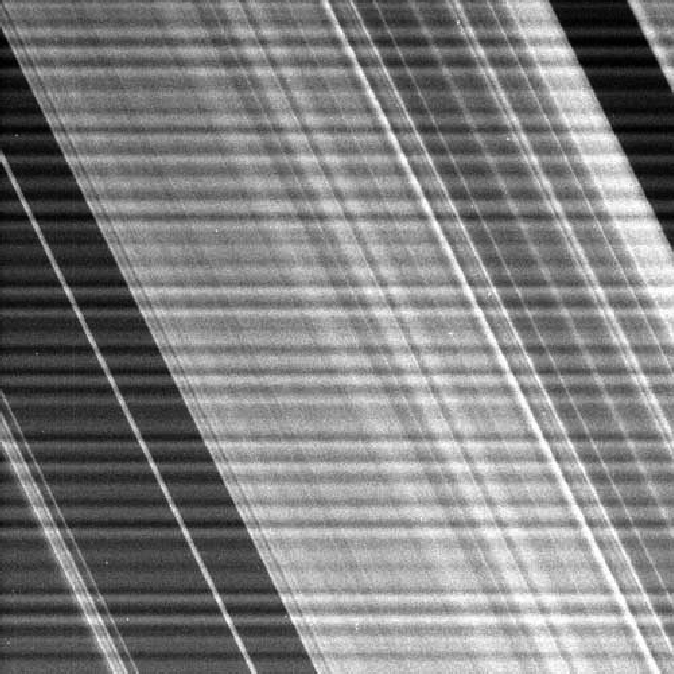

In [3]:
test5 = './实验二素材/test5.tif'
img = Image.open(test5)
display.display(img)
img_np = np.array(img)

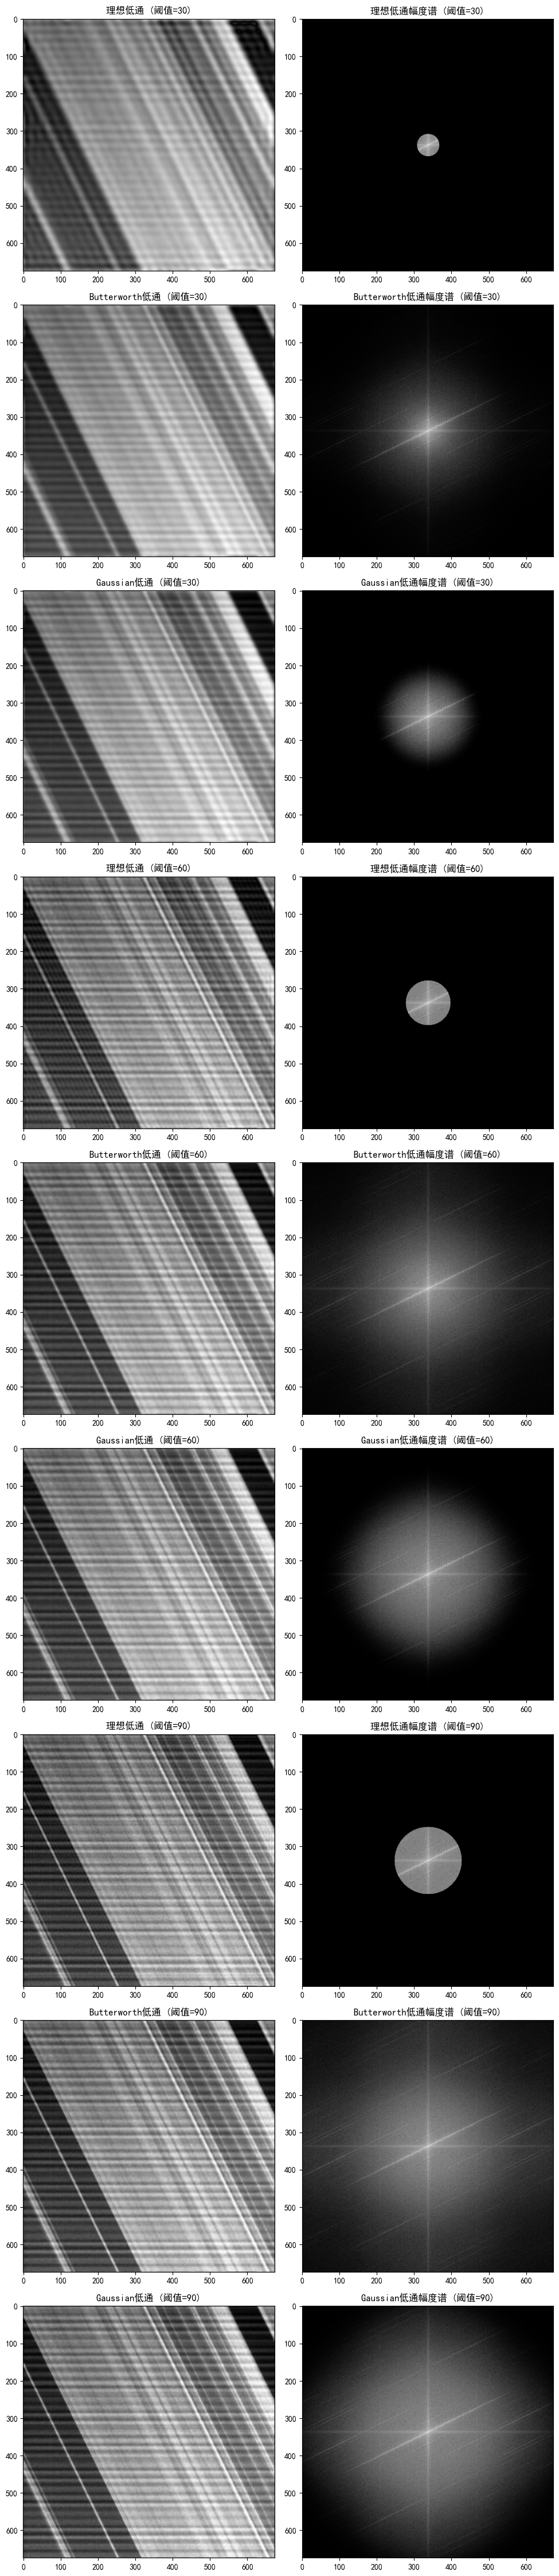

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]


def ideal_lowpass_filter(shape, cutoff):
    P, Q = shape
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            if D <= cutoff:
                H[u, v] = 1
    return H

def butterworth_lowpass_filter(shape, cutoff, order):
    P, Q = shape
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_lowpass_filter(shape, cutoff):
    P, Q = shape
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

def apply_filter(img, H):
    img_fft = np.fft.fft2(img)
    img_fft_shifted = np.fft.fftshift(img_fft)
    img_fft_filtered = img_fft_shifted * H
    img_ifft_shifted = np.fft.ifftshift(img_fft_filtered)
    img_filtered = np.fft.ifft2(img_ifft_shifted)
    return np.abs(img_filtered), img_fft_shifted, img_fft_filtered

# 加载图像
img = Image.open('./实验二素材/test5.tif').convert('L')
img_np = np.array(img)

# 定义滤波器参数
cutoff_frequencies = [30, 60, 90]
order = 2

# 应用滤波器并显示结果
plt.figure(figsize=(10, 45))

for i, cutoff in enumerate(cutoff_frequencies):
    H_ideal = ideal_lowpass_filter(img_np.shape, cutoff)
    H_butterworth = butterworth_lowpass_filter(img_np.shape, cutoff, order)
    H_gaussian = gaussian_lowpass_filter(img_np.shape, cutoff)
    
    img_ideal, fft_ideal, filtered_fft_ideal = apply_filter(img_np, H_ideal)
    img_butterworth, fft_butterworth, filtered_fft_butterworth = apply_filter(img_np, H_butterworth)
    img_gaussian, fft_gaussian, filtered_fft_gaussian = apply_filter(img_np, H_gaussian)
    
    plt.subplot(9, 2, i*6 + 1)
    plt.title(f'理想低通 (阈值={cutoff})')
    plt.imshow(img_ideal, cmap='gray')
    
    plt.subplot(9, 2, i*6 + 2)
    plt.title(f'理想低通幅度谱 (阈值={cutoff})')
    plt.imshow(np.log(np.abs(filtered_fft_ideal) + 1), cmap='gray')
    
    plt.subplot(9, 2, i*6 + 3)
    plt.title(f'Butterworth低通 (阈值={cutoff})')
    plt.imshow(img_butterworth, cmap='gray')
    
    plt.subplot(9, 2, i*6 + 4)
    plt.title(f'Butterworth低通幅度谱 (阈值={cutoff})')
    plt.imshow(np.log(np.abs(filtered_fft_butterworth) + 1), cmap='gray')
    
    plt.subplot(9, 2, i*6 + 5)
    plt.title(f'Gaussian低通 (阈值={cutoff})')
    plt.imshow(img_gaussian, cmap='gray')

    plt.subplot(9, 2, i*6 + 6)
    plt.title(f'Gaussian低通幅度谱 (阈值={cutoff})')
    plt.imshow(np.log(np.abs(filtered_fft_gaussian) + 1), cmap='gray')

plt.tight_layout()
plt.show()


比较与总结：
1. 理想低通滤波器
    - 优点：完全去除高于截止频率的频率成分
    - 缺点：空间域产生振铃效应（Gibbs现象）
2. 巴特沃斯低通滤波器
    - 优点：在截止频率附近有较好的平滑性，振铃效应弱
    - 缺点：在截止频率附近的频率成分无法完全去除
3. 高斯低通滤波器
    - 优点：在截止频率附近有最好的平滑性，无振铃效应
    - 缺点：在截止频率附近的频率成分无法完全去除

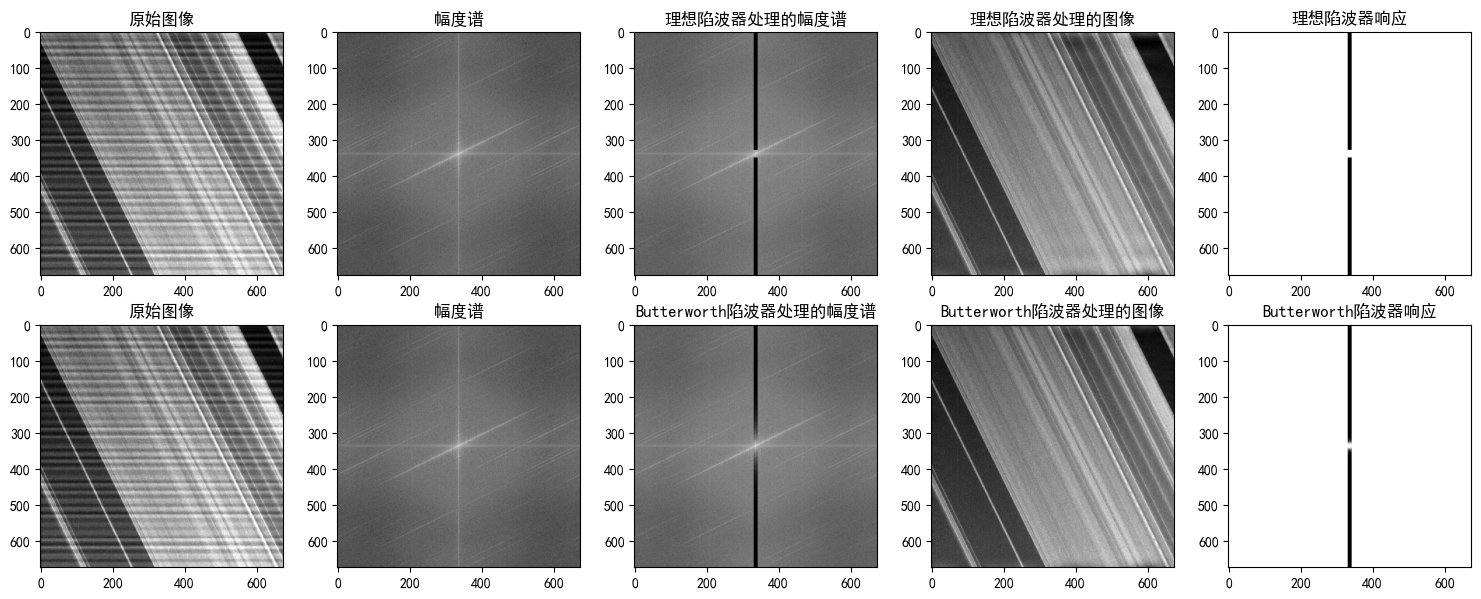

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]


# 加载图像
img = Image.open('./实验二素材/test5.tif').convert('L')
img_np = np.array(img)

def ideal_notch_filter(shape, cutoff, width):
    P, Q = shape
    H = np.ones((P, Q))
    center_x = P // 2
    center_y = Q // 2
    
    for i in range(P):
        for j in range(Q):
            if (center_x - width // 2 < j < center_x + width // 2) and (np.sqrt((i - center_y)**2) > cutoff):
                H[i, j] = 0
    return H

def butterworth_notch_filter(shape, cutoff, width, order=2):
    P, Q = shape
    H = np.ones((P, Q))
    center_x = P // 2
    center_y = Q // 2
    
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center_x)**2 + (v - center_y)**2)
            if center_x - width // 2 < v < center_x + width // 2:
                H[u, v] = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def apply_filter(img, H):
    img_fft = np.fft.fft2(img)
    img_fft_shifted = np.fft.fftshift(img_fft)
    img_fft_filtered = img_fft_shifted * H
    img_ifft_shifted = np.fft.ifftshift(img_fft_filtered)
    img_filtered = np.fft.ifft2(img_ifft_shifted)
    return np.abs(img_filtered), img_fft_shifted, img_fft_filtered

# 定义陷波滤波器参数
cutoff_frequency = 10 # 陷波中心频率
bandwidth = 12 # 陷波带宽

# 设计陷波滤波器
H_notch = ideal_notch_filter(img_np.shape, cutoff_frequency, bandwidth)
H_notch2 = butterworth_notch_filter(img_np.shape, cutoff_frequency, bandwidth)

# 应用陷波滤波器
img_notch_filtered, fft_notch, filtered_fft_notch = apply_filter(img_np, H_notch)
img_notch_filtered2, fft_notch2, filtered_fft_notch2 = apply_filter(img_np, H_notch2)

# 显示结果
plt.figure(figsize=(15, 6))

plt.subplot(251)
plt.title('原始图像')
plt.imshow(img, cmap='gray')

plt.subplot(252)
plt.title('幅度谱')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_np))) + 1), cmap='gray')

plt.subplot(253)
plt.title('理想陷波器处理的幅度谱')
plt.imshow(np.log(np.abs(filtered_fft_notch) + 1), cmap='gray')

plt.subplot(254)
plt.title('理想陷波器处理的图像')
plt.imshow(img_notch_filtered, cmap='gray')

plt.subplot(255)
plt.title('理想陷波器响应')
plt.imshow(H_notch, cmap='gray')

plt.subplot(256)
plt.title('原始图像')
plt.imshow(img, cmap='gray')

plt.subplot(257)
plt.title('幅度谱')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_np))) + 1), cmap='gray')

plt.subplot(258)
plt.title('Butterworth陷波器处理的幅度谱')
plt.imshow(np.log(np.abs(filtered_fft_notch2) + 1), cmap='gray')

plt.subplot(259)
plt.title('Butterworth陷波器处理的图像')
plt.imshow(img_notch_filtered2, cmap='gray')

plt.subplot(2,5,10)
plt.title('Butterworth陷波器响应')
plt.imshow(H_notch2, cmap='gray')

plt.tight_layout()
plt.show()

由于在竖直方向出现了正弦干扰，因此选择在竖直方向进行滤波。

由于理想陷波滤波器在截止频率附近的振铃效应较强，因此选择巴特沃斯陷波滤波器。

陷波滤波器减弱了图像中的横向条纹。由于使用巴特沃斯陷波滤波器，边缘效应得到了较好的控制。
低通滤波器将高频成分整体衰减，不仅抑制了横向条纹，同时也模糊了整个图像。

## 2-11

(-0.5, 813.5, 650.5, -0.5)

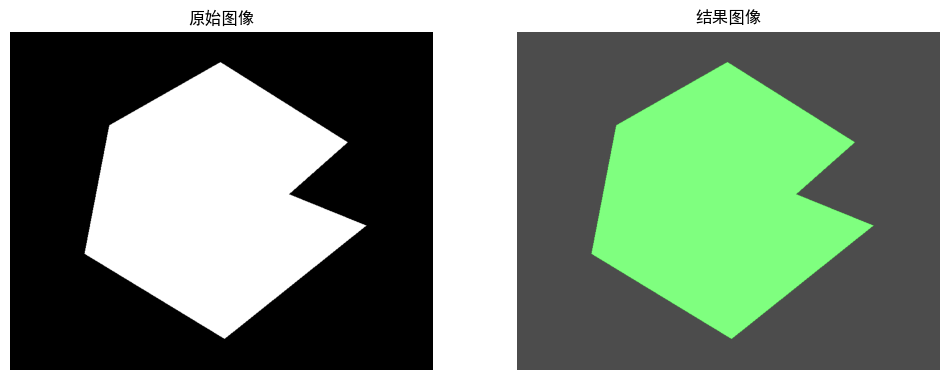

In [16]:
from PIL import Image
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]


image = "./实验二素材/test6.tif"
image = Image.open(image).convert("L")
image_np = np.array(image)

threshold = 128

rgba_image = np.zeros((image_np.shape[0], image_np.shape[1], 4), dtype=np.uint8)

# Set the RGBA values
rgba_image[..., 0] = image_np
rgba_image[..., 1] = image_np
rgba_image[..., 2] = image_np
rgba_image[..., 3] = 255

bright_indices = image_np > threshold
rgba_image[bright_indices, 0] = 0
rgba_image[bright_indices, 1] = 255
rgba_image[bright_indices, 2] = 0
rgba_image[bright_indices, 3] = 128

# Create and save the RGBA image
rgba_image_pil = Image.fromarray(rgba_image, 'RGBA')
rgba_image_pil

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("原始图像")
axs[0].axis('off')

axs[1].imshow(rgba_image_pil, cmap='gray')
axs[1].set_title("结果图像")
axs[1].axis('off')

## 2-12

手动

(-0.5, 511.5, 511.5, -0.5)

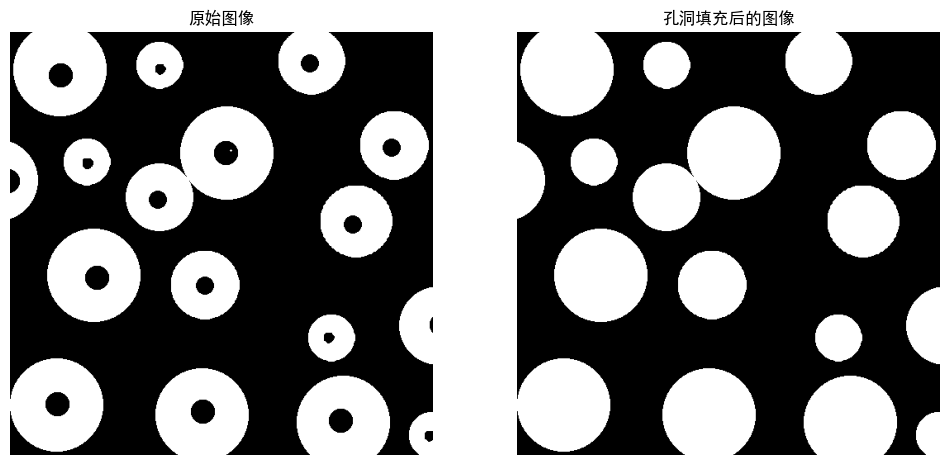

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]


# Load the image
image = "./实验二素材/fill.tif"
image = Image.open(image).convert("L")
image_np = np.array(image)

_, binary_image = cv2.threshold(image_np, 128, 255, cv2.THRESH_BINARY)

binary_image_inv = cv2.bitwise_not(binary_image)

B = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

def fill_hole(x, y, binary_image):
    # Create initial mask with the specified hole position X0
    X_k = np.zeros_like(binary_image)
    X_k[y, x] = 255
    
    # Iteratively apply the algorithm
    while True:
        # Perform the morphological dilation
        X_k_dilated = cv2.dilate(X_k, B)
        
        # Apply the intersection with the complement of the image
        X_k_new = cv2.bitwise_and(X_k_dilated, binary_image_inv)
        
        # Check if X_k_new is equal to X_k
        if np.array_equal(X_k_new, X_k):
            break
        X_k = X_k_new
    
    # Combine the original image with the filled holes
    filled_image = cv2.bitwise_or(binary_image, X_k)
    return filled_image
    

# display.display(image)


filled = fill_hole(63, 49, binary_image)
filled = fill_hole(182, 43, filled)
filled = fill_hole(365, 39, filled)
filled = fill_hole(458, 137, filled)
filled = fill_hole(257, 143, filled)
filled = fill_hole(94, 159, filled)
filled = fill_hole(2, 181, filled)
filled = fill_hole(179, 202, filled)
filled = fill_hole(414, 232, filled)
filled = fill_hole(236, 306, filled)
filled = fill_hole(104, 296, filled)
filled = fill_hole(55, 451, filled)
filled = fill_hole(231, 458, filled)
filled = fill_hole(397, 469, filled)
filled = fill_hole(508, 488, filled)
filled = fill_hole(510, 355, filled)
filled = fill_hole(385, 368, filled)

# filled = fill_hole(50, 50)
# display.display(Image.fromarray(filled))

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(binary_image, cmap='gray')
axs[0].set_title("原始图像")
axs[0].axis('off')

axs[1].imshow(filled, cmap='gray')
axs[1].set_title("孔洞填充后的图像")
axs[1].axis('off')


自动

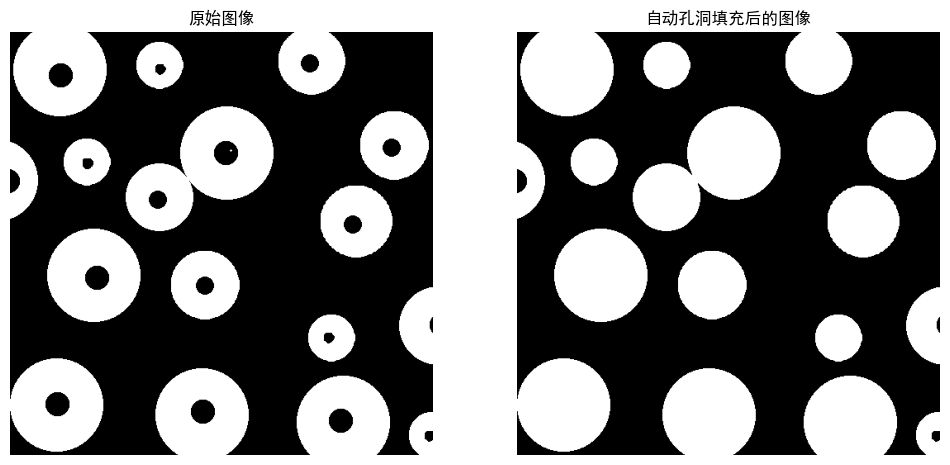

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# Load the image
image = "./实验二素材/fill.tif"
image = Image.open(image).convert("L")  # Convert to grayscale
image_np = np.array(image)

# Binarize the image
_, binary_image = cv2.threshold(image_np, 128, 255, cv2.THRESH_BINARY)

# Create the initial mask F
F = np.zeros_like(binary_image)
F[:, 0] = 1 - binary_image[:, 0]
F[:, -1] = 1 - binary_image[:, -1]
F[0, :] = 1 - binary_image[0, :]
F[-1, :] = 1 - binary_image[-1, :]

# Initialize geodesic dilation
R = F.copy()
I_complement = cv2.bitwise_not(binary_image)

# Structuring element
B = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Geodesic dilation
while True:
    R_prev = R.copy()
    R = cv2.dilate(R, B)
    R = cv2.bitwise_and(R, I_complement)
    if np.array_equal(R, R_prev):
        break

# Final hole-filled image
H = cv2.bitwise_not(R)

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(binary_image, cmap='gray')
axs[0].set_title("原始图像")
axs[0].axis('off')

axs[1].imshow(H, cmap='gray')
axs[1].set_title("自动孔洞填充后的图像")
axs[1].axis('off')

plt.show()


# 2-13

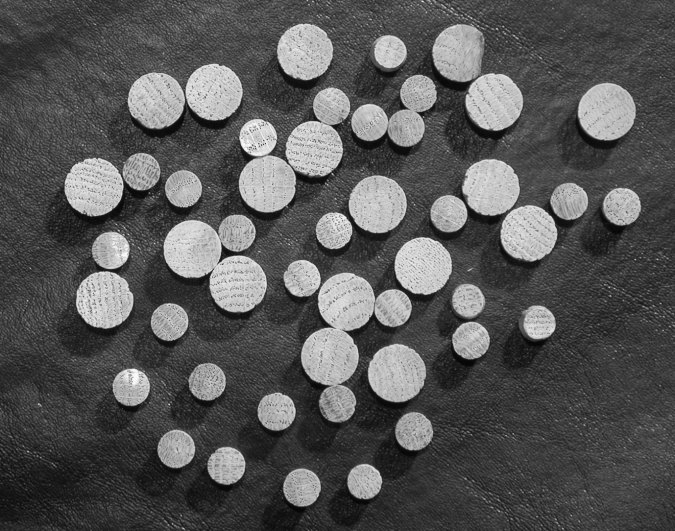

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display


image = "./实验二素材/wood.tif"
image = Image.open(image).convert("L")  # Convert to grayscale
image_np = np.array(image)
display.display(image)

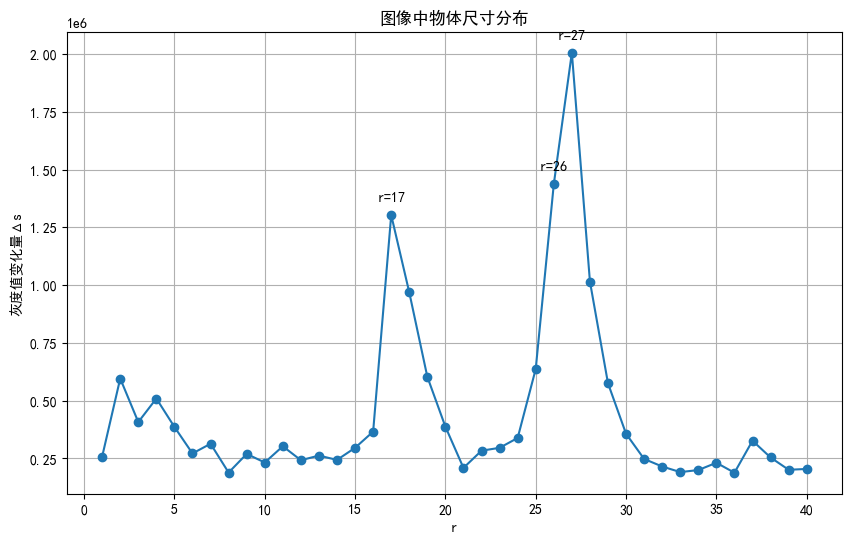

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gaussian_smoothing(image, sigma=1):
    return cv2.GaussianBlur(image, (0, 0), sigma)

def morphological_opening(image, radius):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*radius+1, 2*radius+1))
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def compute_size_distribution(image, max_radius=20):
    smoothed_image = gaussian_smoothing(image)
    f_prev = smoothed_image
    s_prev = np.sum(smoothed_image)
    
    radius_list = []
    delta_s_list = []
    
    for r in range(1, max_radius+1):
        f_current = morphological_opening(f_prev, r)
        s_current = np.sum(f_current)
        
        delta_s = s_prev - s_current
        radius_list.append(r)
        delta_s_list.append(delta_s)
        
        f_prev = f_current
        s_prev = s_current
    
    return radius_list, delta_s_list

# Load the image
image = "./实验二素材/wood.tif"
image = Image.open(image).convert("L")  # Convert to grayscale
image_np = np.array(image)

# Compute size distribution
max_radius = 40  # Define the maximum radius for the structuring element
radii, delta_s = compute_size_distribution(image_np, max_radius)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(radii, delta_s, marker='o')
plt.xlabel("r")
plt.ylabel("灰度值变化量Δs")
plt.title("图像中物体尺寸分布")
plt.grid(True)

# Identify the top 3 points
top_indices = np.argsort(delta_s)[-3:]
top_radii = [radii[i] for i in top_indices]
top_delta_s = [delta_s[i] for i in top_indices]

# Annotate the top 3 points
for i in range(3):
    plt.annotate(f"r={top_radii[i]}", (top_radii[i], top_delta_s[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()
